In [56]:
# regression
from sklearn.datasets import load_diabetes
data = load_diabetes()
X, y = data.data, data.target

In [57]:
from sklearn.feature_selection import mutual_info_regression

coef = mutual_info_regression(X, y)

In [58]:
feature_names = data.feature_names
target_name = "target"
print(coef)
print(feature_names)

[0.         0.03479953 0.17495188 0.05903303 0.06809792 0.01236269
 0.06976571 0.10794777 0.1438673  0.10669956]
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [59]:
coef_dict = {feature_names[i]: coef[i] for i in range(len(coef))}
# coef_dict = {}
# for i in range(len(coef)):
#     coef_dict[feature_names[i]] = coef[i]
sorted_values = sorted(coef_dict.items(), key=lambda x: x[1], reverse=True)

ordered_feature_names = [x[0] for x in sorted_values]
# ordered_feature_names = []
# for x in sorted_values:
#     ordered_feature_names.append(x[0])
ordered_coef = [x[1] for x in sorted_values]
# ordered_coef = []
# for x in sorted_values:
#     ordered_coef.append(x[1])

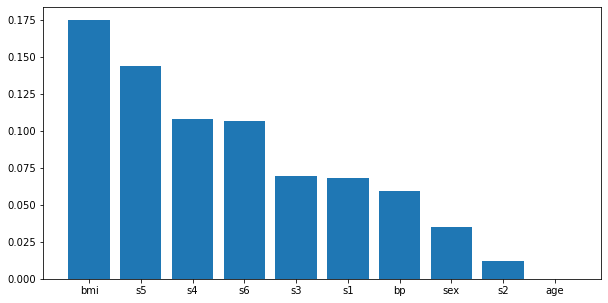

In [60]:
import matplotlib.pyplot as plt 
%matplotlib inline 

_ = plt.figure(figsize=(10, 5))
plt.bar(ordered_feature_names, ordered_coef)
plt.show()

In [61]:
import numpy as np 

ordered_coef = np.asarray(ordered_coef)
kept_features_coef = np.where(ordered_coef > 0.15)[0]
print(f"Coef features care au MI > 0.75: {kept_features_coef}")

ordered_feature_names = np.asarray(ordered_feature_names)
kept_features = ordered_feature_names[kept_features_coef]
print(f"Features for above coefs: {kept_features}")

Coef features care au MI > 0.75: [0]
Features for above coefs: ['bmi']


In [62]:
import pandas as pd
df = pd.DataFrame(X, columns=feature_names)
df = df[kept_features]
df.head()

,bmi
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
r = LinearRegression()
r = r.fit(X_train, y_train)
y_train_pred = r.predict(X_train)
y_test_pred = r.predict(X_test)
mse_train = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
mse_test = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
print(f"MSE Train: {mse_train}")
print(f"MSE Test: {mse_test}")


MSE Train: 3854.1126520758194
MSE Test: 4061.825928494928


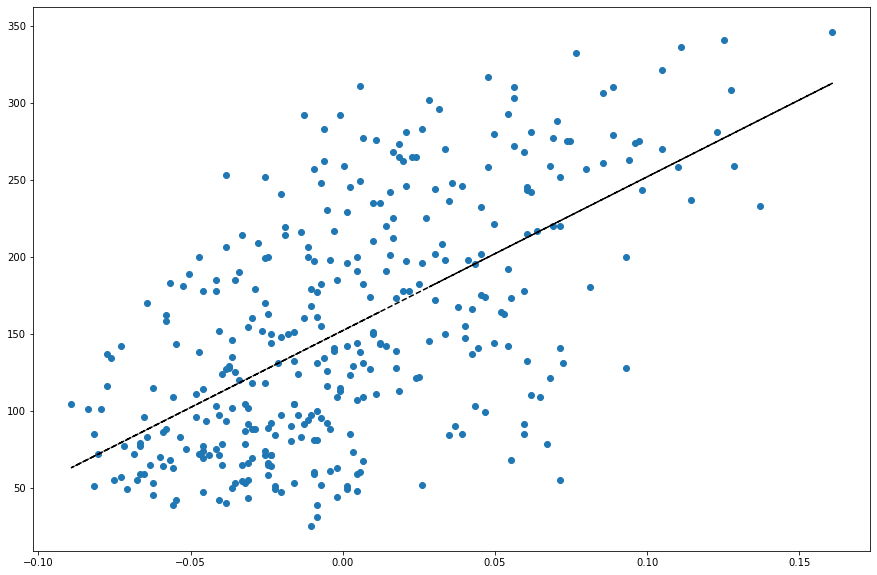

In [64]:
_ = plt.figure(figsize=(15, 10))
plt.plot(X_train, y_train_pred, 'k--')
plt.scatter(X_train, y_train)
plt.show()

In [65]:
# classification
from sklearn.datasets import load_wine
data = load_wine()
X, y = data.data, data.target

In [66]:
from sklearn.feature_selection import mutual_info_classif

coef = mutual_info_classif(X, y)

In [67]:
feature_names = data.feature_names
target_name = "target"
print(coef)
print(feature_names)

[0.47439239 0.29621466 0.0613568  0.24621283 0.21176289 0.40883687
 0.66420257 0.113252   0.28345787 0.55185569 0.4574868  0.51389273
 0.5539472 ]
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [68]:
coef_dict = {feature_names[i]: coef[i] for i in range(len(coef))}

sorted_values = sorted(coef_dict.items(), key=lambda x: x[1], reverse=True)

ordered_feature_names = [x[0] for x in sorted_values]

ordered_coef = [x[1] for x in sorted_values]


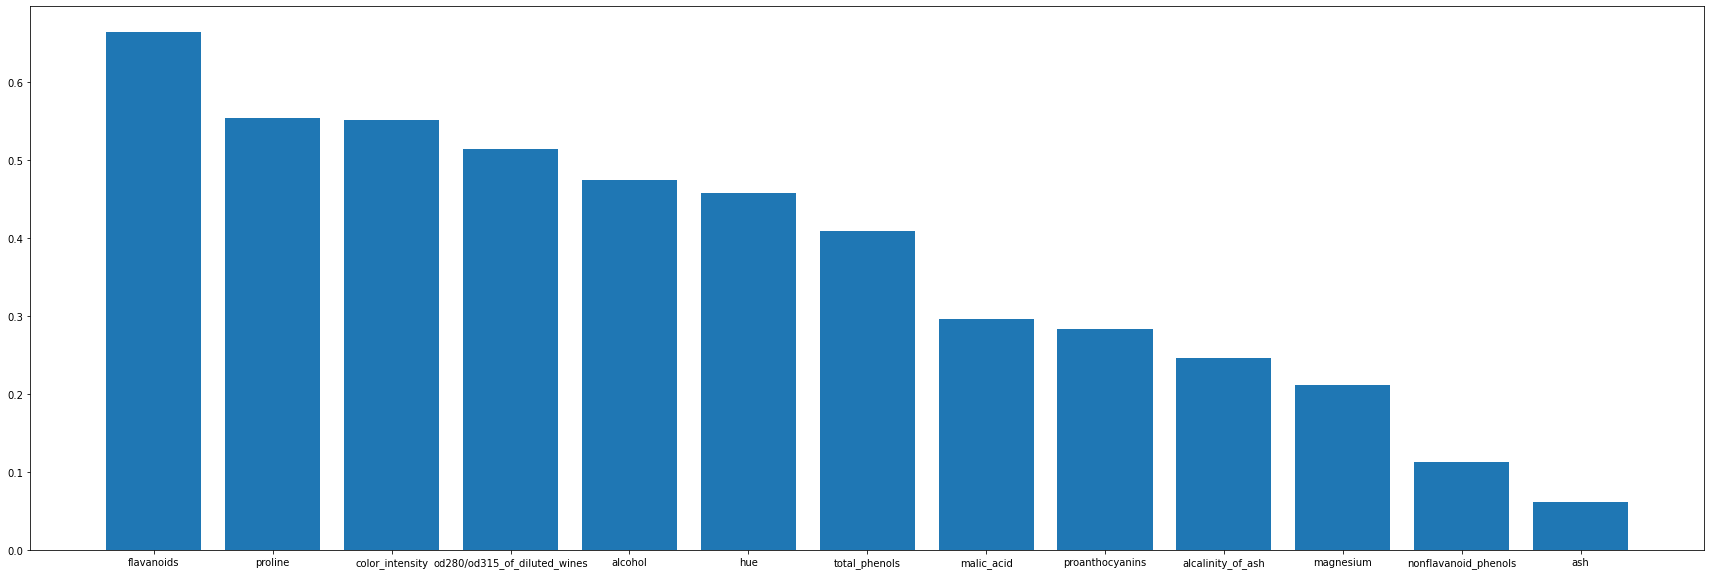

In [69]:
import matplotlib.pyplot as plt 
%matplotlib inline 

_ = plt.figure(figsize=(30, 10))
plt.bar(ordered_feature_names, ordered_coef)
plt.show()

In [76]:
import numpy as np 

ordered_coef = np.asarray(ordered_coef)
kept_features_coef = np.where(ordered_coef > 0.30)[0]
print(f"Coef features care au MI > 0.1: {kept_features_coef}")

ordered_feature_names = np.asarray(ordered_feature_names)
kept_features = ordered_feature_names[kept_features_coef]
print(f"Features for above coefs: {kept_features}")

Coef features care au MI > 0.1: [0 1 2 3 4 5 6]
Features for above coefs: ['flavanoids' 'proline' 'color_intensity' 'od280/od315_of_diluted_wines'
 'alcohol' 'hue' 'total_phenols']


In [77]:
import pandas as pd
df = pd.DataFrame(X, columns=feature_names)
df = df[kept_features]
df.head()

,flavanoids,proline,color_intensity,od280/od315_of_diluted_wines,alcohol,hue,total_phenols
0,3.06,1065.0,5.64,3.92,14.23,1.04,2.80
1,2.76,1050.0,4.38,3.40,13.20,1.05,2.65
2,3.24,1185.0,5.68,3.17,13.16,1.03,2.80
3,3.49,1480.0,7.80,3.45,14.37,0.86,3.85
4,2.69,735.0,4.32,2.93,13.24,1.04,2.80


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
r = RidgeClassifier()
r = r.fit(X_train, y_train)
y_train_pred = r.predict(X_train)
y_test_pred = r.predict(X_test)
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)
print(f"Accuracy Train: {acc_train}")
print(f"Accuracy Test: {acc_test}")

Accuracy Train: 0.9507042253521126
Accuracy Test: 1.0


In [81]:
X_train.shape
# y_train_pred.shape

(142, 7)

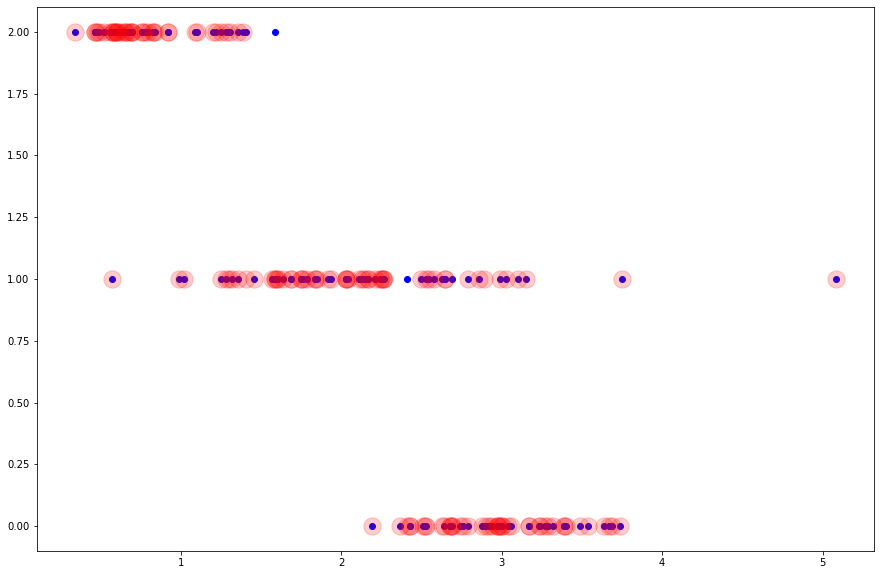

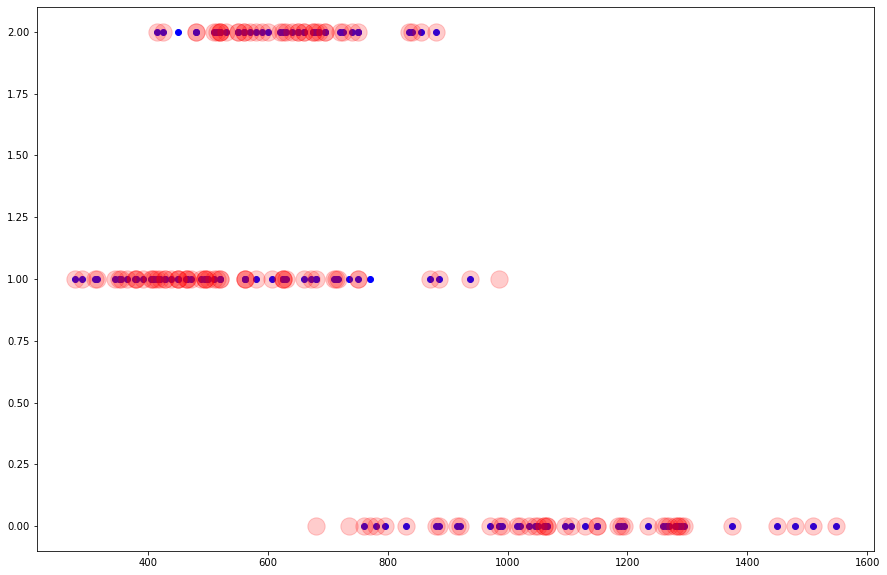

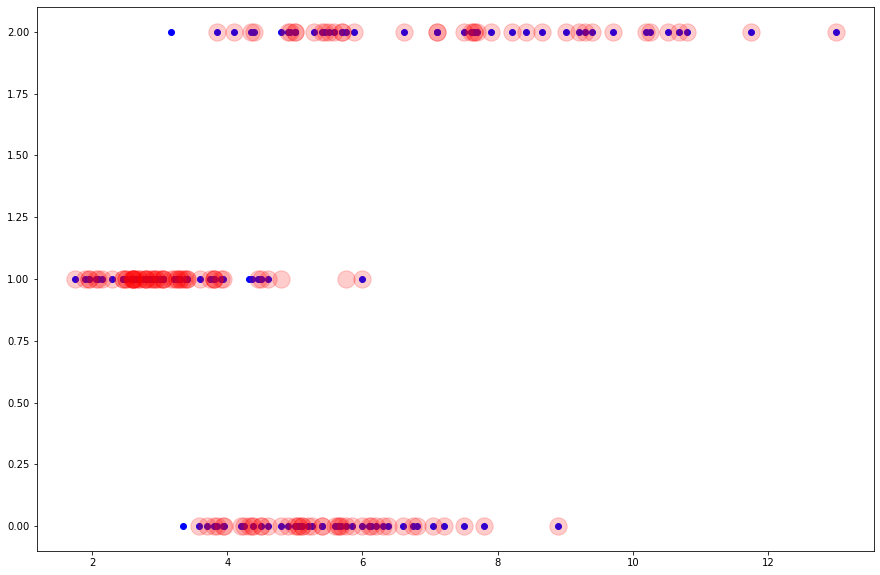

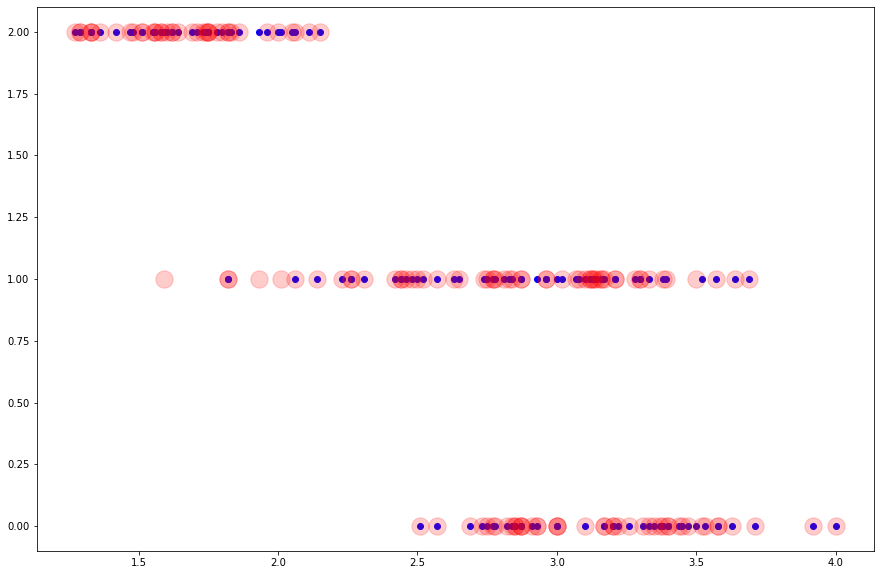

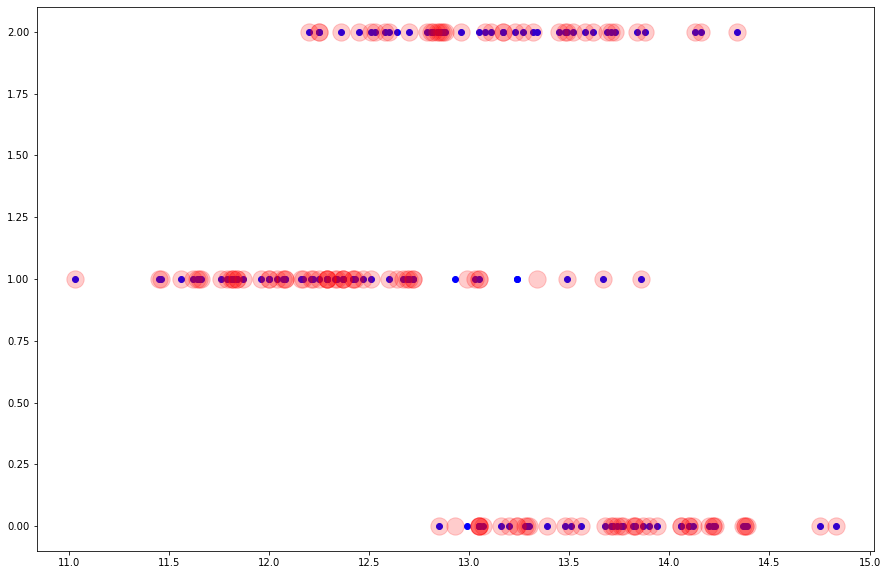

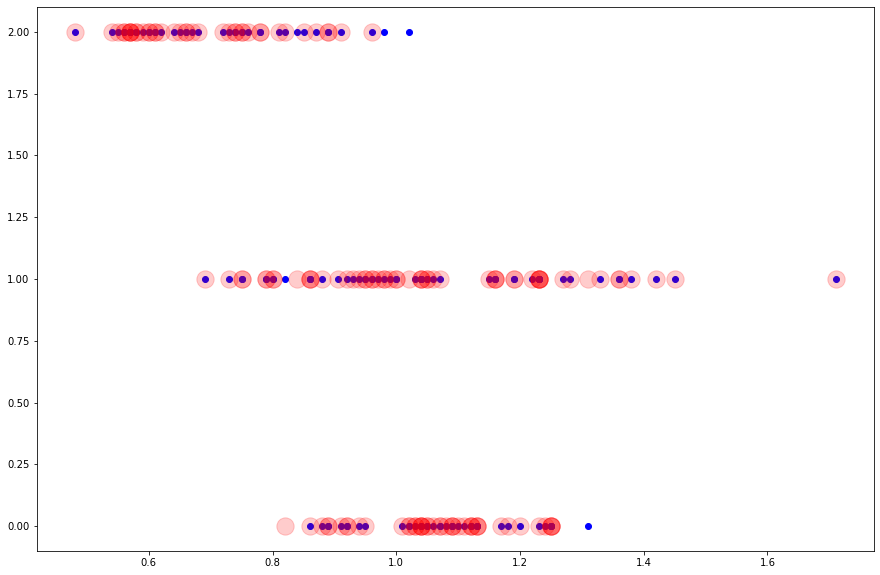

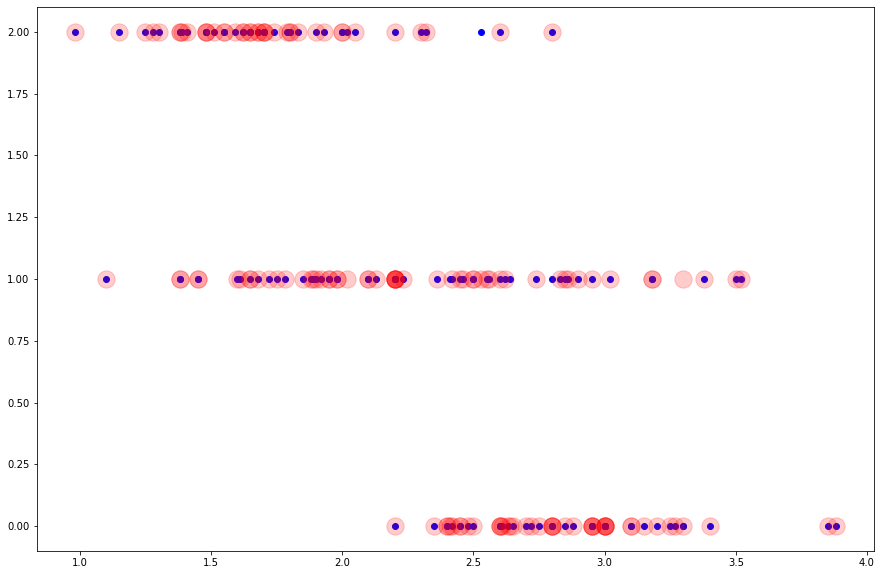

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in X_train.columns:
   


    _ = plt.figure(figsize=(15, 10))
    plt.scatter(X_train[i], y_train_pred, c='blue')
    plt.scatter(X_train[i], y_train, c='red', alpha = 0.2, s = 300)
    plt.show()

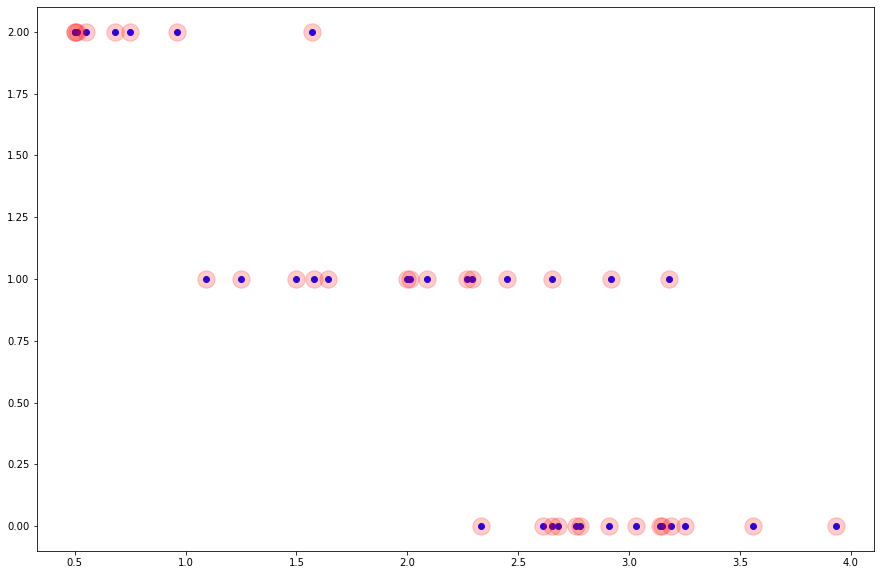

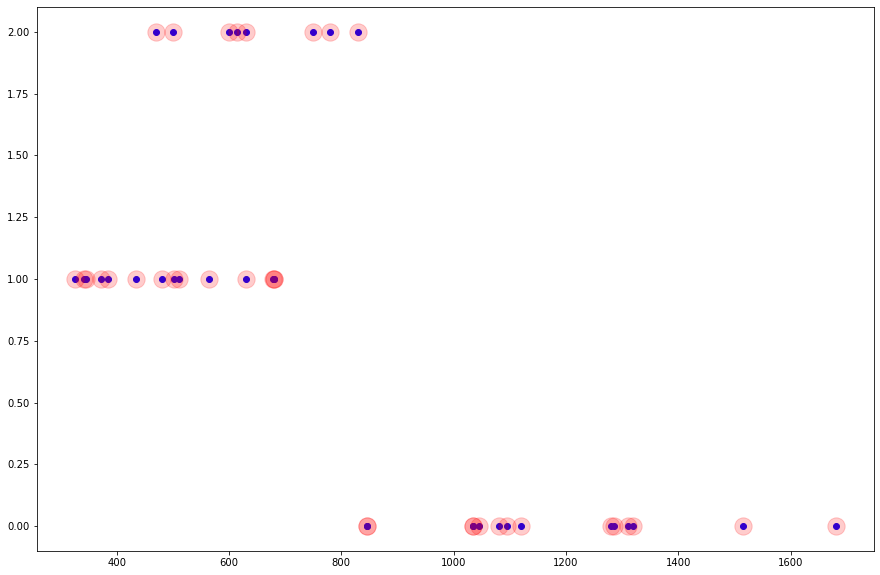

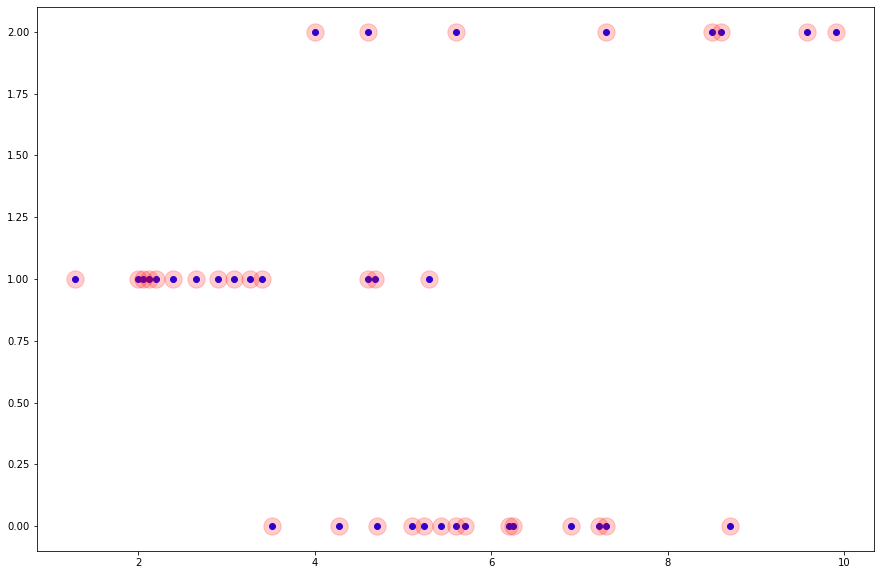

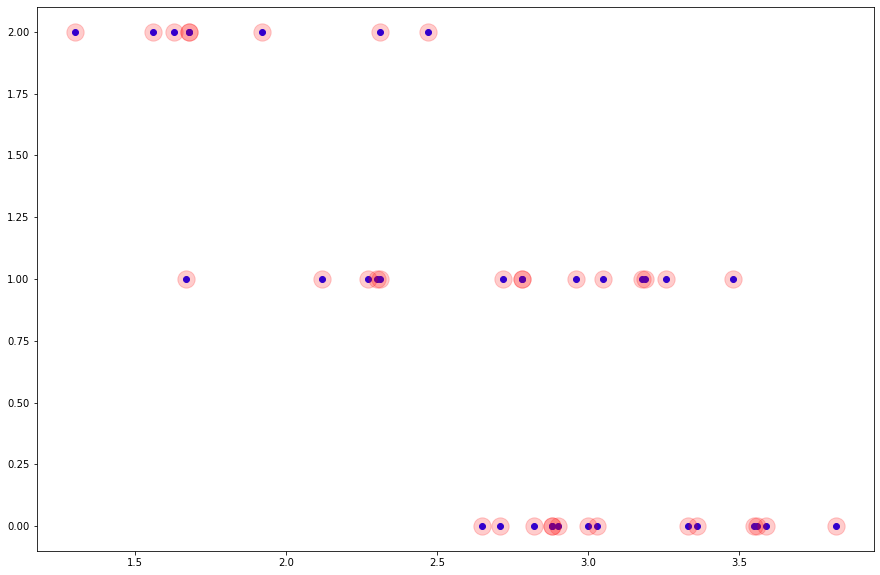

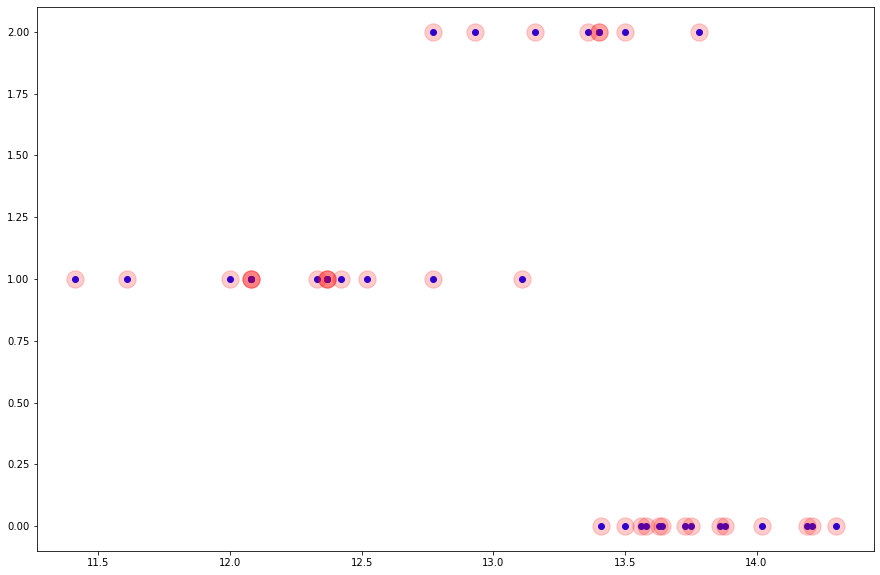

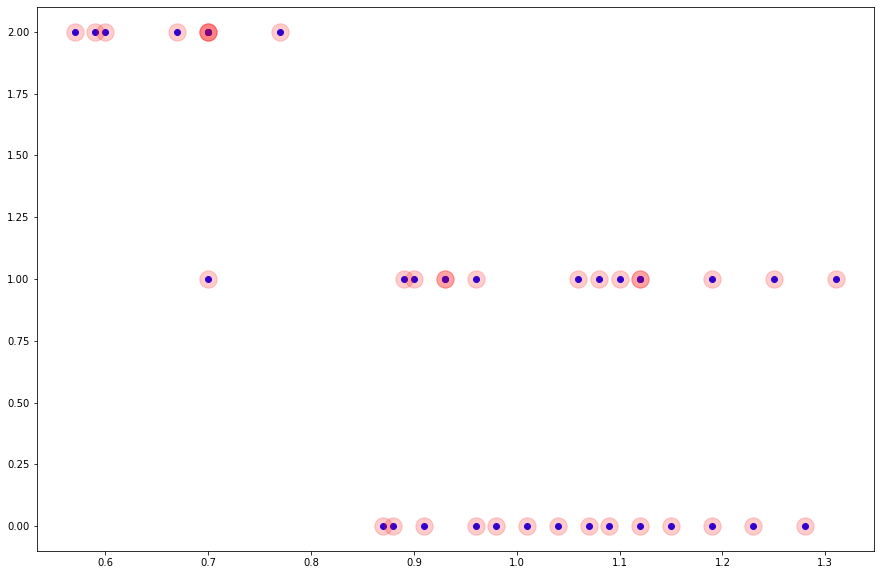

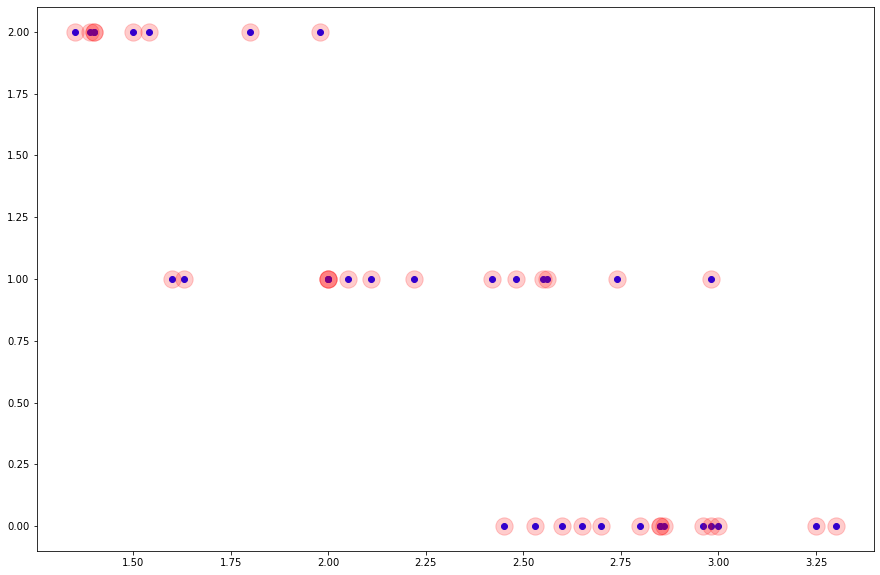

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in X_train.columns:
   
    _ = plt.figure(figsize=(15, 10))
    plt.scatter(X_test[i], y_test_pred, c='blue')
    plt.scatter(X_test[i], y_test, c='red', alpha = 0.2, s = 300)
    plt.show()